# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm 
import seaborn as sns

In [2]:
import pandas as pd

[2.04443083 2.76964432 2.25176313 2.7316776  2.20934656 2.57753375
 2.06030169 2.7931762  2.8456907  2.94015383]


/Users/pablogtorres/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

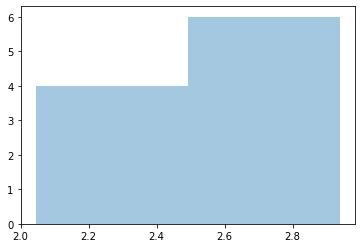

In [3]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)
sns.distplot(randoms, kde=False)

**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [4]:
# your code here
def unipablo(n,b,c):
    count = uniform.rvs(size=n)
    randoms = b + (c-b)*count
    return randoms


In [5]:
model1 = pd.DataFrame(unipablo(10000000,10,15), columns = ['Results'])

In [6]:
model2 = pd.DataFrame(unipablo(10000000,10,60), columns = ['Results'])

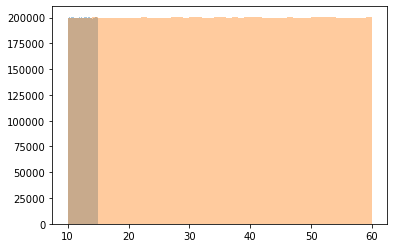

In [8]:


sns.distplot(model1, kde=False)
sns.distplot(model2, kde=False)

plt.show()

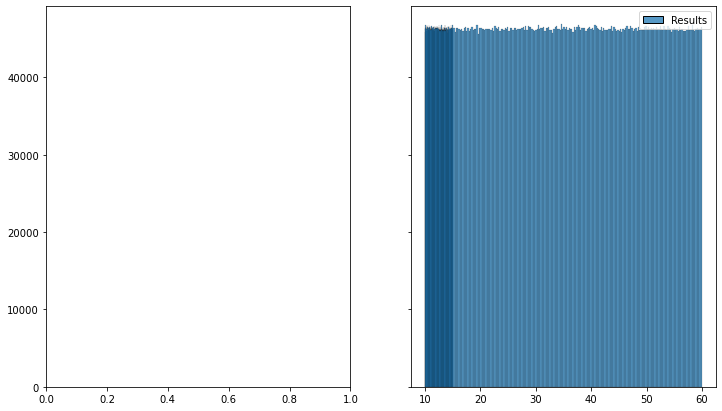

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,7), sharey=True )

ax1 = sns.histplot(model1, kde=False)
ax2 = sns.histplot(model2, kde=False)

plt.show()

<AxesSubplot:ylabel='Count'>

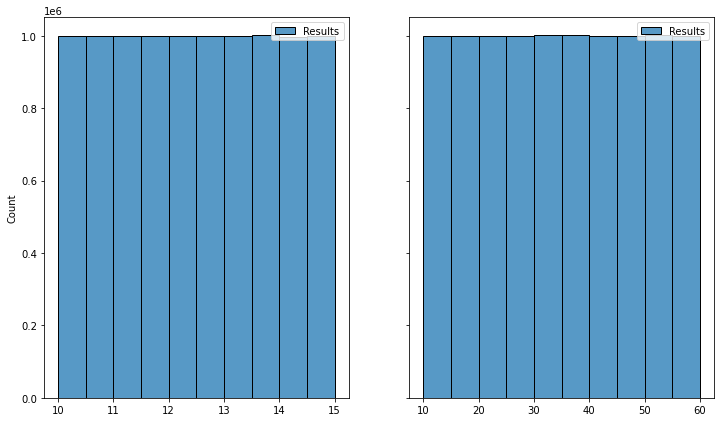

In [11]:
f, axes = plt.subplots(1, 2, figsize=(12,7), sharey=True )
sns.histplot(model1,ax=axes[0], bins=10)
sns.histplot(model2,ax=axes[1], bins=10)

How are the two distributions different?

In [12]:
from scipy.stats import kstest
from scipy.stats import normaltest
from scipy.stats import uniform

In [21]:
# your answer here: The samples share the same distribution type

uni = uniform.rvs(loc=0, scale=10, size = 100)
test_stat = kstest(uni, uniform.rvs(loc=0, scale=10, size=1000000))
test_stat

KstestResult(statistic=0.10391099999999998, pvalue=0.21495234850574907)

In [22]:
from scipy.stats import normaltest

In [23]:
normaltest(uni)

NormaltestResult(statistic=42.49132560745064, pvalue=5.930972084975224e-10)

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

In [24]:
# your code here
def normpablo(s,m,st):
    randoms = norm.rvs(loc=m, scale=st, size=s)
    return randoms

In [65]:
norm1 = normpablo(1000,10,1)
norm2 = normpablo(1000,10,50)

<AxesSubplot:>

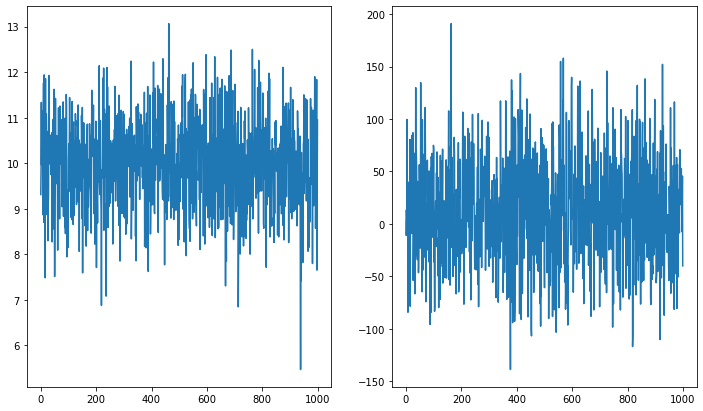

In [66]:
f, axes = plt.subplots(1, 2, figsize=(12,7))
sns.lineplot(data=norm1,ax=axes[0])
sns.lineplot(data=norm2,ax=axes[1])


<AxesSubplot:ylabel='Count'>

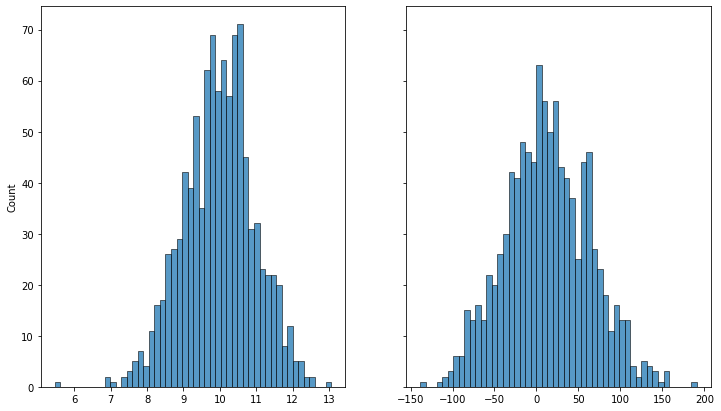

In [67]:
f, axes = plt.subplots(1, 2, figsize=(12,7), sharey=True )
sns.histplot(norm1,ax=axes[0], bins=50)
sns.histplot(norm2,ax=axes[1], bins=50)

/Users/pablogtorres/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


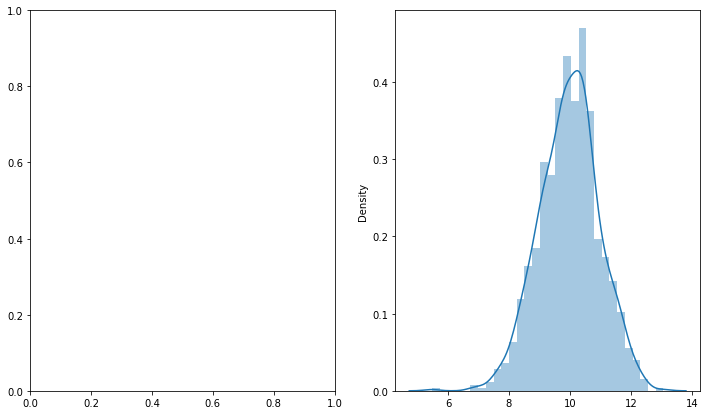

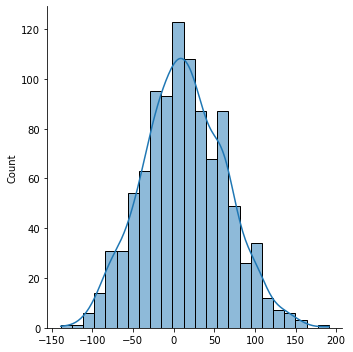

In [68]:
f, axes = plt.subplots(1, 2, figsize=(12,7))
sns.distplot(norm1,kde=True)
sns.displot(norm2,kde=True)

How are the two distributions different?

In [69]:
# your answer here:
normaltest(norm1)

NormaltestResult(statistic=8.460783178315236, pvalue=0.014546693105661155)

In [70]:
normaltest(norm2)

NormaltestResult(statistic=2.7460509514623768, pvalue=0.2533393269260325)

In [71]:
test_stat = kstest(norm1, norm2)
test_stat

KstestResult(statistic=0.486, pvalue=2.0161492552371155e-107)

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

In [72]:
# your code here
df = pd.read_csv('vehicles.csv')

In [73]:
df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


<AxesSubplot:xlabel='Fuel Barrels/Year', ylabel='Count'>

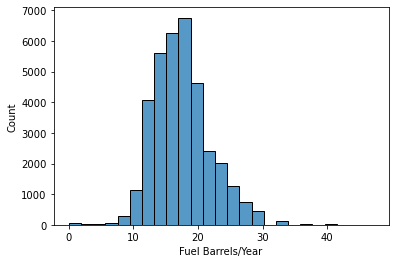

In [74]:
sns.histplot(df['Fuel Barrels/Year'],bins=25)

2. CO2 Emission Grams/Mile 

<AxesSubplot:xlabel='CO2 Emission Grams/Mile', ylabel='Count'>

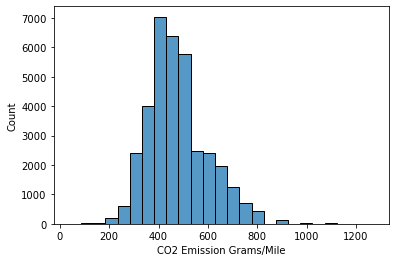

In [75]:
# your code here
sns.histplot(df['CO2 Emission Grams/Mile'],bins=25)

3. Combined MPG

<AxesSubplot:xlabel='Combined MPG', ylabel='Count'>

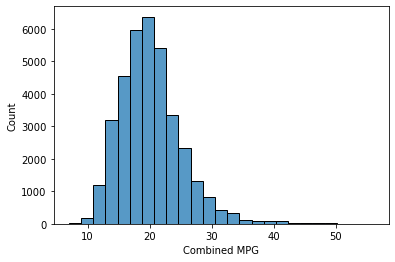

In [76]:
# your code here
sns.histplot(df['Combined MPG'],bins=25)

/Users/pablogtorres/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Combined MPG', ylabel='Density'>

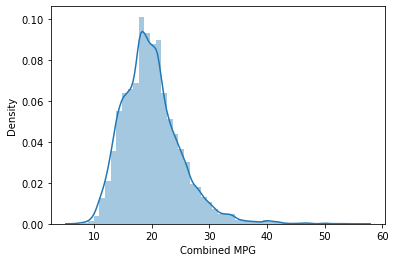

In [77]:
sns.distplot(df['Combined MPG'], kde=True)

Which one(s) of the variables are nearly normally distributed? How do you know?

In [78]:
from scipy import stats


In [79]:
# you answer here:We dont know, we need to test. With a Pearson test, we cannot conclude that any variable is coming from a Normal distribution. 

k2, p = stats.normaltest(df['Combined MPG'])
k2,p

(6994.459897617527, 0.0)

In [80]:
s2, p = stats.normaltest(df['CO2 Emission Grams/Mile'])
s2,p

(3608.604030545311, 0.0)

In [81]:
s2, p = stats.normaltest(df['Fuel Barrels/Year'])
s2,p

(3216.559790182245, 0.0)

In [82]:
df['Fuel Barrels/Year'].skew()

0.6382712089398946

In [83]:
df['CO2 Emission Grams/Mile'].skew()

0.7416918391899279

In [84]:
df['Combined MPG'].skew()

1.067772701547105

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with a mean of 1 and 100 and a size of 1000.

1. Plot the distributions as histograms with the number of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

In [85]:
# your code here

def exppablo(s1,s2):
    randoms = np.random.exponential(scale=s1, size=s2)
    return randoms
exppablo(10,100)

array([ 8.89235571,  3.83279556,  6.95025577, 25.3763729 ,  0.66102427,
       10.61206134,  9.62228125, 31.59261293, 11.29300976,  6.05478176,
        9.43896236,  2.83776666, 18.02380781, 11.15891284, 10.12889572,
        4.62813513,  8.26474391,  7.81697957,  4.26349291, 19.92876097,
        2.05103478,  3.24990761,  1.97295418,  1.51784528, 14.3966475 ,
       14.82323869,  1.0961902 ,  2.06861222,  7.18311764,  5.52823907,
        2.32499623,  0.65591472, 23.60358766,  2.08468521, 24.58308898,
        3.115984  ,  1.85416487, 16.02951623,  8.87596297,  6.12594991,
        0.65884113,  3.45615879,  3.03711676,  5.06865435,  5.62079005,
       13.02655494,  4.41289664, 14.93246713,  7.56580732,  5.25027623,
        1.00219119,  3.38238017, 11.66404356,  7.19079979, 15.22612896,
        9.67729896,  8.77276391, 10.91308758,  4.74537186, 63.7956307 ,
       10.30042604, 16.27393477, 21.14418918, 12.51517945, 20.15738144,
        2.55861308, 16.5752425 ,  3.20688729,  7.00417718,  1.24

In [86]:
exp1= exppablo(10,1000)

In [87]:
exp2= exppablo(100,1000)

<AxesSubplot:ylabel='Count'>

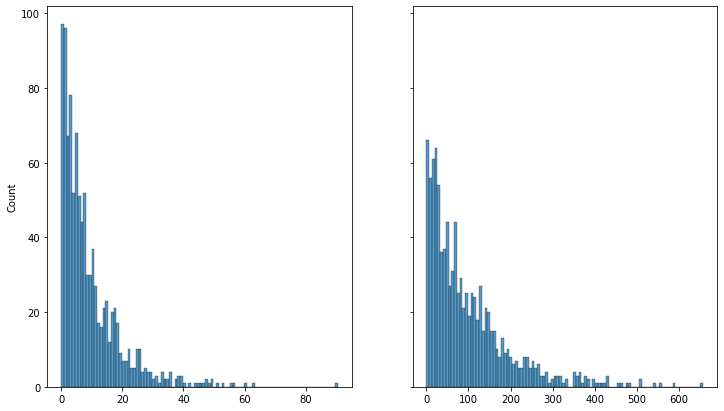

In [88]:
f, axes = plt.subplots(1, 2, figsize=(12,7), sharey=True )
sns.histplot(exp1,ax=axes[0], bins=100)
sns.histplot(exp2,ax=axes[1], bins=100)

How are the two distributions different?

In [89]:
# your answer here:
test_stat = kstest(exp1, exp2)
test_stat


KstestResult(statistic=0.703, pvalue=1.913210671452109e-237)

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

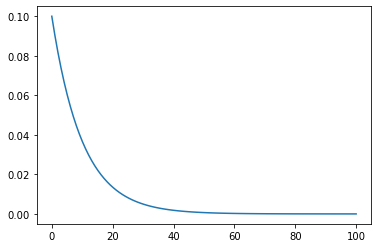

In [90]:
# your answer here
# Hint: This is same as saying P(x<15)
from scipy.stats import expon

bank = expon(scale = 10)
x = np.linspace(0,100,100)
y = expon.pdf(x, scale=10)
fig, ax = plt.subplots(1, 1)
ax.plot(x,y)

In [91]:
print(bank.cdf(15))  

0.7768698398515702


What is the probability that the customer will spend more than 15 minutes

In [92]:
# your answer here
print(1 - bank.cdf(15))  

0.2231301601484298


In [93]:
print(bank)

In [94]:
bank.mean()

10.0

In [95]:
for i in range(20):
    print(i)
    print(bank.cdf(i))


0
0.0
1
0.09516258196404044
2
0.18126924692201815
3
0.2591817793182821
4
0.3296799539643607
5
0.3934693402873666
6
0.4511883639059735
7
0.5034146962085905
8
0.5506710358827784
9
0.5934303402594009
10
0.6321205588285577
11
0.6671289163019205
12
0.6988057880877978
13
0.7274682069659875
14
0.7534030360583935
15
0.7768698398515702
16
0.7981034820053446
17
0.8173164759472653
18
0.8347011117784134
19
0.8504313807773649
